# Imports

In [15]:
import re
import os
import requests
import pandas as pd
import spacy
# import string
from PIL import Image
from os import path
import numpy as np
# import pickle
import matplotlib.pyplot as plt
import seaborn as sns
# import itertools
from bs4 import BeautifulSoup
from gensim.summarization import summarize
# import collections
# import sys
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist

from nltk.stem.snowball import SnowballStemmer


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def strip_html(text):
    arts = []
    soup = BeautifulSoup(text, "html.parser")    # Removing HTML tags
    arts.append(soup.get_text())
    return arts

In [ ]:
def word_cloud(doc, colormap='tab10', mode='RGBA', path=''):
  cloud = WordCloud(width=1600, height=800, stopwords=STOPWORDS, colormap=colormap, background_color=None, mode=mode).generate(doc)
  plt.figure(figsize=(20,20))
  plt.imshow(cloud)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.savefig(path, transparent=True)
  plt.show()

In [17]:
def word_cloud_(doc, colormap='tab10', mode='RGBA', from_='', to=''):
  d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
  mask = np.array(Image.open(path.join(d, from_)))

  cloud = WordCloud(background_color=None, max_words=2000, mask=mask, colormap=colormap,
               stopwords=STOPWORDS, contour_width=1, contour_color='white').generate(doc)
  plt.figure(figsize=(15,15))
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.savefig(to)
  plt.show()

# Initial Scrape

In [ ]:
url = 'https://www.npr.org/2020/01/30/801382383/white-house-moves-to-formally-decriminalize-accidentally-killing-birds'
res = requests.get(url, headers={"User-Agent":"Mozilla/8.0"})
con = res.text
# TAGS = ['a']
soupy = BeautifulSoup(con, 'lxml')
text_ = soupy.find_all(class_= 'slug')
# text_ = soupy.find_all(TAGS)
# text = text_
# text.append(text_)

In [ ]:
links = []
for link in soupy.find_all('a'):
  links.append(link.get('href'))
  # print(links.get('href'))

Drill into links for appropriate section

In [ ]:
prefix = ''
full_links = []
for link in links:
  full_link = prefix+link
  full_links.append(full_link)
len(full_links)

# Main Scraper

In [37]:
# ids0 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Tech/npr.csv')
# ids1 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Tech/npr (1).csv')
# ids2 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/npr (2).csv')
# ids3 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/npr (3).csv')
# ids4 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/npr (4).csv')
# ids5 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/npr (5).csv')
# ids6 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/npr (6).csv')
# ids7 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/npr (7).csv')
# ids8 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/npr (8).csv')
# ids9 = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Business/npr (10).csv')

# ids0_ = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/Pt2/npr.csv')
# ids1_ = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Politics/Pt2/npr (1).csv')
# ids2_ = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Health/Pt2/npr (2).csv')
# ids3_ = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Business/Pt2/npr (3).csv')
# ids4_ = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Business/Pt2/npr (4).csv')
# ids5_ = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Business/Pt2/npr (5).csv')
# ids6_ = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Business/Pt2/npr (6).csv')



comp = pd.concat([ids0, ids1, ids2, ids3, ids4, ids5, ids6, ids7, ids8, 
                    ids0_, ids1_, ids2_, ids3_, ids4_, ids5_, ids6_], ignore_index=True)

print(comp.shape)
# comp.drop(columns='affiliation', inplace=True)
comp.drop_duplicates(inplace=True)
# comp.dropna(inplace=True)
print(comp.shape)
comp.head()

comp_ = pd.DataFrame(comp['title href'][00:30])
# comp_.dropna(inplace=True)
comp_.shape

(825, 1)
(643, 1)


(30, 1)

In [29]:
# NPR paragraphs
# ids = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/InstantDataScraper/Business/npr (8).csv')

articles = []
subjects = []
for full_link in comp_['title href']:
  res = requests.get(full_link, headers={"User-Agent":"Mozilla/8.0"})
  con = res.text
  soupy = BeautifulSoup(con, 'lxml')
  text_ = soupy.find_all('p')
  articles.append(str(text_))
  topics = soupy.find_all(class_= 'slug')
  good = strip_html(str(topics))
  better = str(good)[5:]
  best = ''
  for char in better:
    if char != '\\':
      best += char
    else:
      break
  subjects.append(best)

stripped = []
for article in articles:
  stripped.append(strip_html(article))
demo=[item for stripped in stripped for item in stripped]
test = set(demo)
samp = list(test)
arts = pd.DataFrame(samp)
arts['articles'] = arts[0]
arts.drop(columns=0, inplace=True)

stops = stopwords.words('english')
stops.append('said')
stops.append('says')
stops.append('npr')
stops.append('time')
stops.append('getty')
stops.append('images')
stops.append('caption')
stops.append('hide')

summaries = []
clean_complete = []
alpha_only = []
for article in arts.articles:
  article_ = re.sub(r'(The Associated Press)', '', article)
  article_ = re.sub(r'(ESPN\'s)', '', article_)
  article_ = re.sub(r'(NPR\'s)', '', article_)
  article_ = re.sub(r'(NPR)', '', article_)
  article_ = re.sub(r'[[\]]', '', article_)
  article_ = re.sub(r'(,)', '', article_)
  article_ = re.sub(r'(Advertisement)', '', article_)
  article_ = re.sub(r'(Supported by)', '', article_)
  article_ = article_.split()
  article_ = ' '.join(article_)
  clean_complete.append(article_)
  summary = summarize(article_, word_count=375)
  text_summary = word_tokenize(summary)
  text_words = word_tokenize(article_)
  
  temp = ''
  for word in text_words:
    if word.isalpha():
      temp += ' '+ word.lower()

  temp__ = ''
  temp_ = word_tokenize(temp)
  for word in temp_:
    if word not in stops:
      temp__ += ' '+ word
  alpha_only.append(temp__)

  temp_summary = ''

  for word in text_summary:
    if word.isalpha():
      temp_summary += ' '+word.lower()
  temp_s_ = ''
  temp_s = word_tokenize(temp_summary)

  for word in temp_s:
    if word not in stops:
      temp_s_ += ' '+ word
  summaries.append(temp_s_)

print(len(alpha_only))
print(len(summaries))
print(len(clean_complete))

df0= pd.DataFrame(clean_complete)
df0['clean'] = df0[0]
df0.drop(columns= 0, inplace= True)
df0['summary'] = summaries
df0['alpha_only'] = alpha_only
################################################
df0['labels'] = subjects

# df = df0.copy()

1


In [ ]:
df_ = pd.concat([df0, df1, df2], ignore_index=True)

In [ ]:
# df_.labels.value_counts()

In [ ]:
# df = df0.copy()
th = pd.DataFrame(df0.labels.value_counts())
sa = dict(th.labels[:10])
ah = list(sa.keys())
ah

In [ ]:
one = pd.DataFrame(df0[df0['labels'] == 'Health'])
two = pd.DataFrame(df0[df0['labels'] == 'Your Health'])
three = pd.DataFrame(df0[df0['labels'] == 'Public Health'])
# four = pd.DataFrame(df_[df_['labels'] == 'Obituaries'])
# five = pd.DataFrame(df_[df_['labels'] == 'Movies'])
# six = pd.DataFrame(df_[df_['labels'] == 'The Coronavirus Crisis'])
# seven = pd.DataFrame(df_[df_['labels'] == 'Economy'])
# eight = pd.DataFrame(df_[df_['labels'] == 'Health Care'])




top_1 = pd.concat([one, two, three], ignore_index=True)


# top_['labels'] = top_['labels'].replace({'Elections': 'Economy'})
# top_['labels'] = top_['labels'].replace({'The Coronavirus Crisis': 'Economy'})
# top_['labels'] = top_['labels'].replace({'Book Reviews': 'Economy'})
# top_['labels'] = top_['labels'].replace({'Economy': 'Economy'})
# top_['labels'] = top_['labels'].replace({'Public Health': 'Economy'})
# top_['labels'] = top_['labels'].replace({'Author Interviews': 'Economy'})


In [ ]:
two.shape

In [ ]:
# print(one.shape)
print(top_1.shape)

(82, 4)


In [ ]:
# top0.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top0.csv')
# top1.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top1.csv')
# top2.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top2.csv')
# top3.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top3.csv')
# top4.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top4.csv')
# top5.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top5.csv')
# top6.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top6.csv')
# top7.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top7.csv')

# top8.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top8.csv')
# top9.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top9.csv')
# top_.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top_.csv')
top_1.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/top_1.csv')


In [ ]:
# frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]#, df0]
# for frame in frames:
#   print(frame.clean[2]) 

In [ ]:
df_comp = pd.DataFrame()
print(df_comp.shape)
df_comp = pd.concat([top0, top1, top2, top3, top4, top5, top6, top7, top8, top9, top_, top_1], ignore_index=True)
print(df_comp.shape)
df_comp = df_comp.drop_duplicates()
print(df_comp.shape)

(0, 0)
(2846, 4)
(2838, 4)


In [ ]:
df_comp.labels.value_counts()

Politics                  401
Economy                   314
Education                 276
Sports                    254
Environment               250
Technology                232
Business                  194
National                  165
Health                     94
The Coronavirus Crisis     78
Your Health                67
Television                 63
Book Reviews               61
Public Health              60
Arts & Life                43
Author Interviews          34
Treatments                 30
Science                    28
World                      22
Law                        19
Health Inc.                19
Pop Culture                18
Health Care                17
Weather                    16
Music News                 14
TV Reviews                 14
National Security          14
Movie Reviews              13
Elections                  11
Movies                      6
Games                       6
Obituaries                  5
Name: labels, dtype: int64

In [ ]:
df_comp['labels'] = df_comp['labels'].replace({'Book Reviews': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Public Health': 'Health'})
df_comp['labels'] = df_comp['labels'].replace({'Author Interviews': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Arts & Life': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Your Health': 'Health'})
df_comp['labels'] = df_comp['labels'].replace({'Health Inc.': 'Health'})
df_comp['labels'] = df_comp['labels'].replace({'Health Care': 'Health'})
df_comp['labels'] = df_comp['labels'].replace({'Weather': 'Environment'})
df_comp['labels'] = df_comp['labels'].replace({'Music News': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'TV Reviews': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Movie Reviews': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Games': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Television': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Pop Culture': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Obituaries': 'Entertainment'})
df_comp['labels'] = df_comp['labels'].replace({'Movies': 'Entertainment'})


In [ ]:
df_comp.labels.value_counts()

Politics                  401
Economy                   314
Entertainment             277
Education                 276
Environment               266
Health                    257
Sports                    254
Technology                232
Business                  194
National                  165
The Coronavirus Crisis     78
Treatments                 30
Science                    28
World                      22
Law                        19
National Security          14
Elections                  11
Name: labels, dtype: int64

In [ ]:
print(df_comp.shape)
one = pd.DataFrame(df_comp[df_comp['labels'] == 'Economy'])
two = pd.DataFrame(df_comp[df_comp['labels'] == 'Education'])
three = pd.DataFrame(df_comp[df_comp['labels'] == 'Entertainment'])
four = pd.DataFrame(df_comp[df_comp['labels'] == 'Environment'])
five = pd.DataFrame(df_comp[df_comp['labels'] == 'Health'])
# six = pd.DataFrame(df_comp[df_comp['labels'] == 'Politics'])
seven = pd.DataFrame(df_comp[df_comp['labels'] == 'Sports'])
eight = pd.DataFrame(df_comp[df_comp['labels'] == 'Technology'])

df_comp = pd.concat([one, two, three, four, five, seven, eight], ignore_index=True)
print(df_comp.shape)
df_comp = df_comp.drop_duplicates()
print(df_comp.shape)

(2838, 4)
(1876, 4)
(1876, 4)


In [ ]:
df_comp

In [ ]:
df_comp.labels.value_counts()

Economy          313
Entertainment    273
Education        272
Environment      265
Health           256
Sports           252
Technology       230
Name: labels, dtype: int64

In [ ]:
df_comp.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/clean_articles.csv')

# Spacy + Visualizations

In [5]:
df_comp = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/clean_articles.csv', index_col=0)

In [46]:
df_comp.labels.unique()

array(['Economy', 'Education', 'Entertainment', 'Environment', 'Health',
       'Sports', 'Technology'], dtype=object)

In [31]:
samp = df_comp[df_comp['labels'] == 'Economy']
samp.shape

(314, 4)

In [48]:
samp.columns

Index(['clean', 'summary', 'alpha_only', 'labels'], dtype='object')

In [32]:
nlp = spacy.load('en_core_web_sm')
docs = [nlp(text) for text in samp['alpha_only']]
flat_doc_stops = []
for doc in docs:
  for sent in doc.sents:
    for word in sent:
      if not word.is_stop | word.is_punct | word.is_digit:
        flat_doc_stops.append(word.lower_)

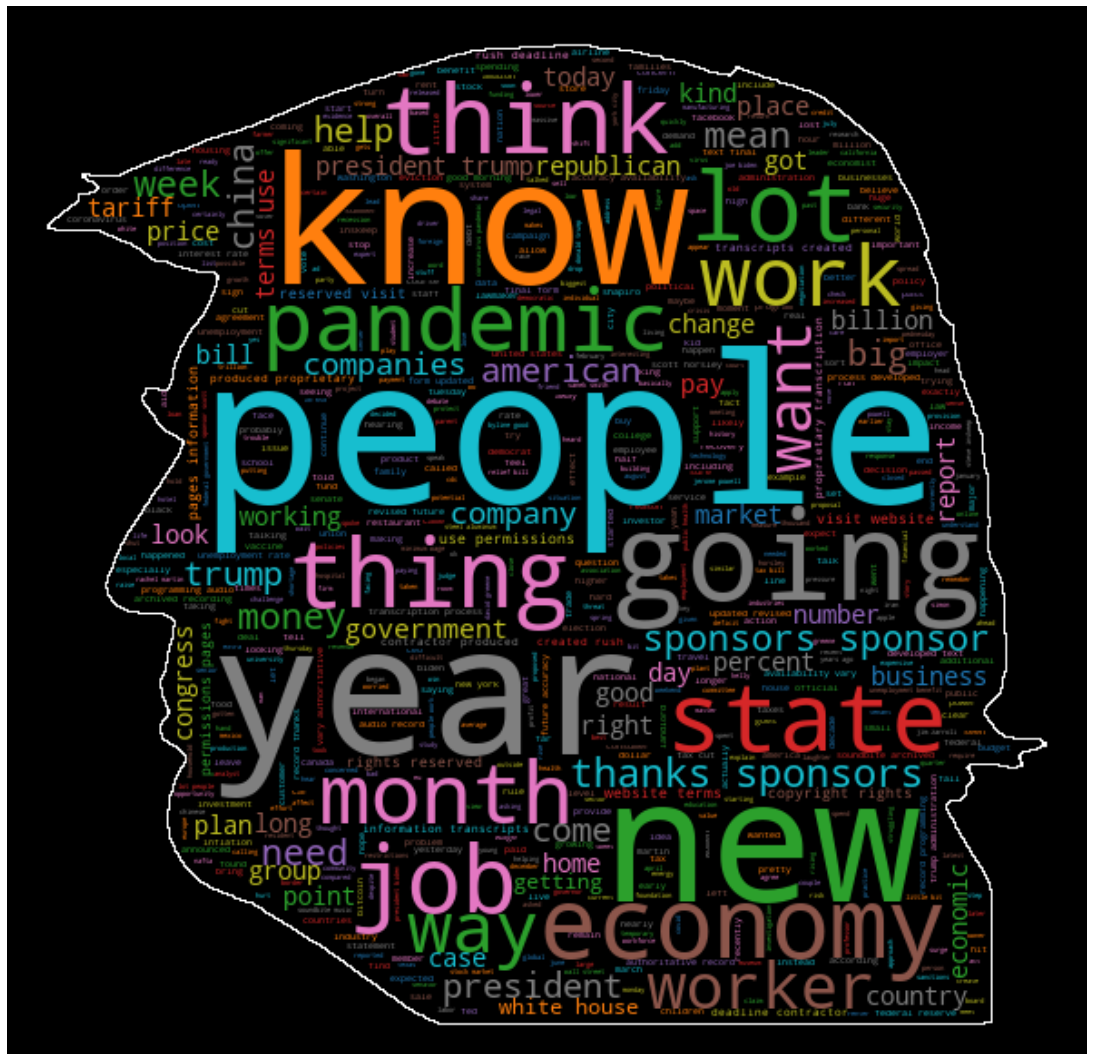

In [33]:
cloud = ' '.join(flat_doc_stops)
word_cloud_(cloud, from_='/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/Trump.png', to='/content/drive/MyDrive/EiT/Week_6/Presentation_6/Visualizations/trumpcloud')

In [ ]:
fdist = FreqDist(flat_doc_stops)
fdist_df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
fdist_df.columns = ['Word','Count']
ordered = fdist_df.sort_values('Count', ascending=False)

plt.figure(figsize=(20,20))
sns.barplot(data=ordered.head(25), x='Count', y='Word')
plt.title('Word Count Distribution For Technology Articles \n', fontsize=48)
plt.xlabel('Count', fontsize=36)
plt.ylabel('Word', fontsize=36)
plt.yticks(fontsize=28, rotation=15)
plt.xticks(fontsize=28)
plt.savefig('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Technology_words', transparent=True)
plt.show()

# Full concatination 

In [ ]:
ba = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/business_articles.csv')
ed = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/education_articles.csv')
ev = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/environment_articles.csv')
en = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/entertainment_articles.csv')
ha = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/health_articles.csv')
po = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/politics_articles.csv')
sp = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/sports_articles.csv')
te = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/tech_articles.csv')

In [ ]:
df_comp = pd.concat([ba, ed, ev, en, ha, po, sp, te], ignore_index=True)
df_comp.drop(columns='Unnamed: 0', inplace=True)
df_comp.labels.value_counts()

health           243
entertainment    236
politics         214
environment      210
tech             195
sports           168
business         143
education        135
Name: labels, dtype: int64

In [ ]:
df_comp.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/df_no_stops.csv')

# Lemma n Stemma

In [ ]:
df_comp.columns

Index(['clean', 'summary', 'alpha_only', 'labels'], dtype='object')

In [ ]:
stemmer = SnowballStemmer('english')

In [ ]:
stemmed = []
for doc in df_comp.summary:
  temp = ''
  for token in word_tokenize(str(doc)):
    temp += ' '+ stemmer.stem(token)
  stemmed.append(temp)

stemmed_ = []
for doc in df_comp.alpha_only:
  temp = ''
  for token in word_tokenize(str(doc)):
    temp += ' '+ stemmer.stem(token)
  stemmed_.append(temp)

In [ ]:
df_comp['sum_stem'] = stemmed
df_comp['alp_stem'] = stemmed_

In [ ]:
df_comp

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
docs = [nlp(str(text)) for text in df_comp['summary']]

lemmed = []
for doc in docs:
  temp = ''
  for sent in doc.sents:
    for word in sent:
      temp += ' '+ word.lemma_
  lemmed.append(temp)

In [ ]:
docs = [nlp(str(text)) for text in df_comp['alpha_only']]

lemmed_ = []
for doc in docs:
  temp = ''
  for sent in doc.sents:
    for word in sent:
      temp += ' '+ word.lemma_
  lemmed_.append(temp)

In [ ]:
df_comp['sum_lem'] = lemmed
df_comp['alp_lem'] = lemmed_

In [ ]:
df_comp

In [ ]:
df_comp = df_comp.reindex(columns=['clean','alpha_only','alp_stem','alp_lem','summary','sum_stem','sum_lem','labels'])

In [ ]:
df_comp.rename(columns={'alpha_only':'complete', 'alp_stem':'comp_stem', 'alp_lem':'comp_lem'}, inplace=True)

# Null checks

In [ ]:
df_comp[df_comp.summary == '']

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels


In [ ]:
df_comp[df_comp.complete == '']

,clean,complete,comp_stem,comp_lem,summary,sum_stem,sum_lem,labels


In [ ]:
todrp = df_comp[df_comp.summary == '']

Int64Index([], dtype='int64')

In [ ]:
todrp.index

Int64Index([27, 447, 448, 472, 559, 626, 629, 661, 670, 1067, 1151, 1442, 1588,
            1670, 1839],
           dtype='int64')

In [ ]:
df_comp.drop([27, 447, 448, 472, 559, 626, 629, 661, 670, 1067, 1151, 1442, 1588,
            1670, 1839], inplace=True)

In [ ]:
df_comp[df_comp.summary == '']

In [ ]:
# df_comp.to_parquet('/content/drive/MyDrive/EiT/Week_6/Presentation_6/final_form.parquet', engine='pyarrow')
# df_comp.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/final_form.csv')

# Train_val set and Test set splitting

In [ ]:
# df_comp = pd.read_parquet('/content/drive/MyDrive/EiT/Week_6/Presentation_6/final_form.parquet', engine='pyarrow')

In [ ]:
df_comp.labels.value_counts()

Economy          313
Entertainment    273
Education        272
Environment      265
Health           256
Sports           252
Technology       230
Name: labels, dtype: int64

In [ ]:
print(df_comp.shape)
df_comp.drop_duplicates(inplace=True)
print(df_comp.shape)

(1861, 8)
(1861, 8)


In [ ]:
df_comp.labels.value_counts()

Economy          313
Entertainment    273
Education        272
Environment      265
Health           256
Sports           252
Technology       230
Name: labels, dtype: int64

In [ ]:
samp = df_comp[df_comp['labels']=='Technology']
samp = pd.DataFrame(samp[200:230])
samp.reset_index(drop=True, inplace=True)

In [ ]:
samp

In [ ]:
# train_val = pd.DataFrame()
# test = pd.DataFrame()
print(test.shape)
test = pd.concat([test, samp], ignore_index=True)
print(test.shape)

(180, 8)
(210, 8)


In [ ]:
train_val.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/train_val_df.csv')
# test.to_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/test_df.csv')

train_val.to_parquet('/content/drive/MyDrive/EiT/Week_6/Presentation_6/train_val_df.parquet', engine='pyarrow')
# test.to_parquet('/content/drive/MyDrive/EiT/Week_6/Presentation_6/test_df.parquet', engine='pyarrow')

In [ ]:
train_val.info()

In [ ]:
train_val.labels.value_counts()

In [ ]:
test.info()

In [ ]:
test.labels.value_counts()

# Oddities

In [ ]:
full = pd.read_csv('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Articles_CSVs/clean_articles.csv', index_col=0)

In [ ]:
full.head(2)

,clean,summary,alpha_only,labels
0,Juul Labs Inc. will pay $40 million to North C...,juul labs pay million north carolina take act...,juul labs pay million north carolina take act...,Economy
1,Camila Domonoske An Uber sticker is seen on a ...,camila domonoske uber sticker seen car start ...,camila domonoske uber sticker seen car start ...,Economy


In [ ]:
full.shape

(1876, 4)

In [ ]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 0 to 1875
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean       1876 non-null   object
 1   summary     1861 non-null   object
 2   alpha_only  1876 non-null   object
 3   labels      1876 non-null   object
dtypes: object(4)
memory usage: 73.3+ KB


In [ ]:
full_ = pd.read_parquet('/content/drive/MyDrive/EiT/Week_6/Presentation_6/Datasets/final_form.parquet', engine='pyarrow')

In [ ]:
full_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 0 to 1875
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   clean      1861 non-null   object
 1   complete   1861 non-null   object
 2   comp_stem  1861 non-null   object
 3   comp_lem   1861 non-null   object
 4   summary    1861 non-null   object
 5   sum_stem   1861 non-null   object
 6   sum_lem    1861 non-null   object
 7   labels     1861 non-null   object
dtypes: object(8)
memory usage: 130.9+ KB


In [ ]:
full.labels.unique()

array(['Economy', 'Education', 'Entertainment', 'Environment', 'Health',
       'Sports', 'Technology'], dtype=object)